In [477]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [478]:
df = pd.read_csv("Student_performance_data _.csv")

In [479]:
df= df.copy()

In [480]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [482]:
df.duplicated().sum()

0

In [483]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [484]:
df.drop('StudentID', axis=1, inplace=True)

### Calculating the GPA Class using the GPA variable and storing in GPA_Class variable

In [485]:
def GPA_Grade(GPA):
    if (GPA >= 3.5):
        return 0.0
    elif (3.0 <= GPA < 3.5):
        return 1.0 
    elif(2.5 <= GPA < 3.0):
        return 2.0
    elif (2.0 <= GPA < 2.5):
        return 3.0
    elif (GPA < 2.0):
        return 4.0
    
df['GPA_Class'] = df['GPA'].apply(GPA_Grade)

In [486]:
sum(df['GPA_Class'] != df['GradeClass'])

168

### There were 168 misclassifications in the GradeClass and the GPA_Grade Class  
Therefore we dropped the GradeClass and the GPA response variables and proceeded with the GPA_Grade variable as our response

In [487]:
df.drop(['GradeClass','GPA'], axis=1, inplace=True)

In [488]:
df_num = df.select_dtypes(include=['int64','float64']).columns
df_cat = df.select_dtypes(include=['object','category']).columns

## Univariate Analysis

### Graphical analysis of the numerical variables

In [489]:
df_num

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA_Class'],
      dtype='object')

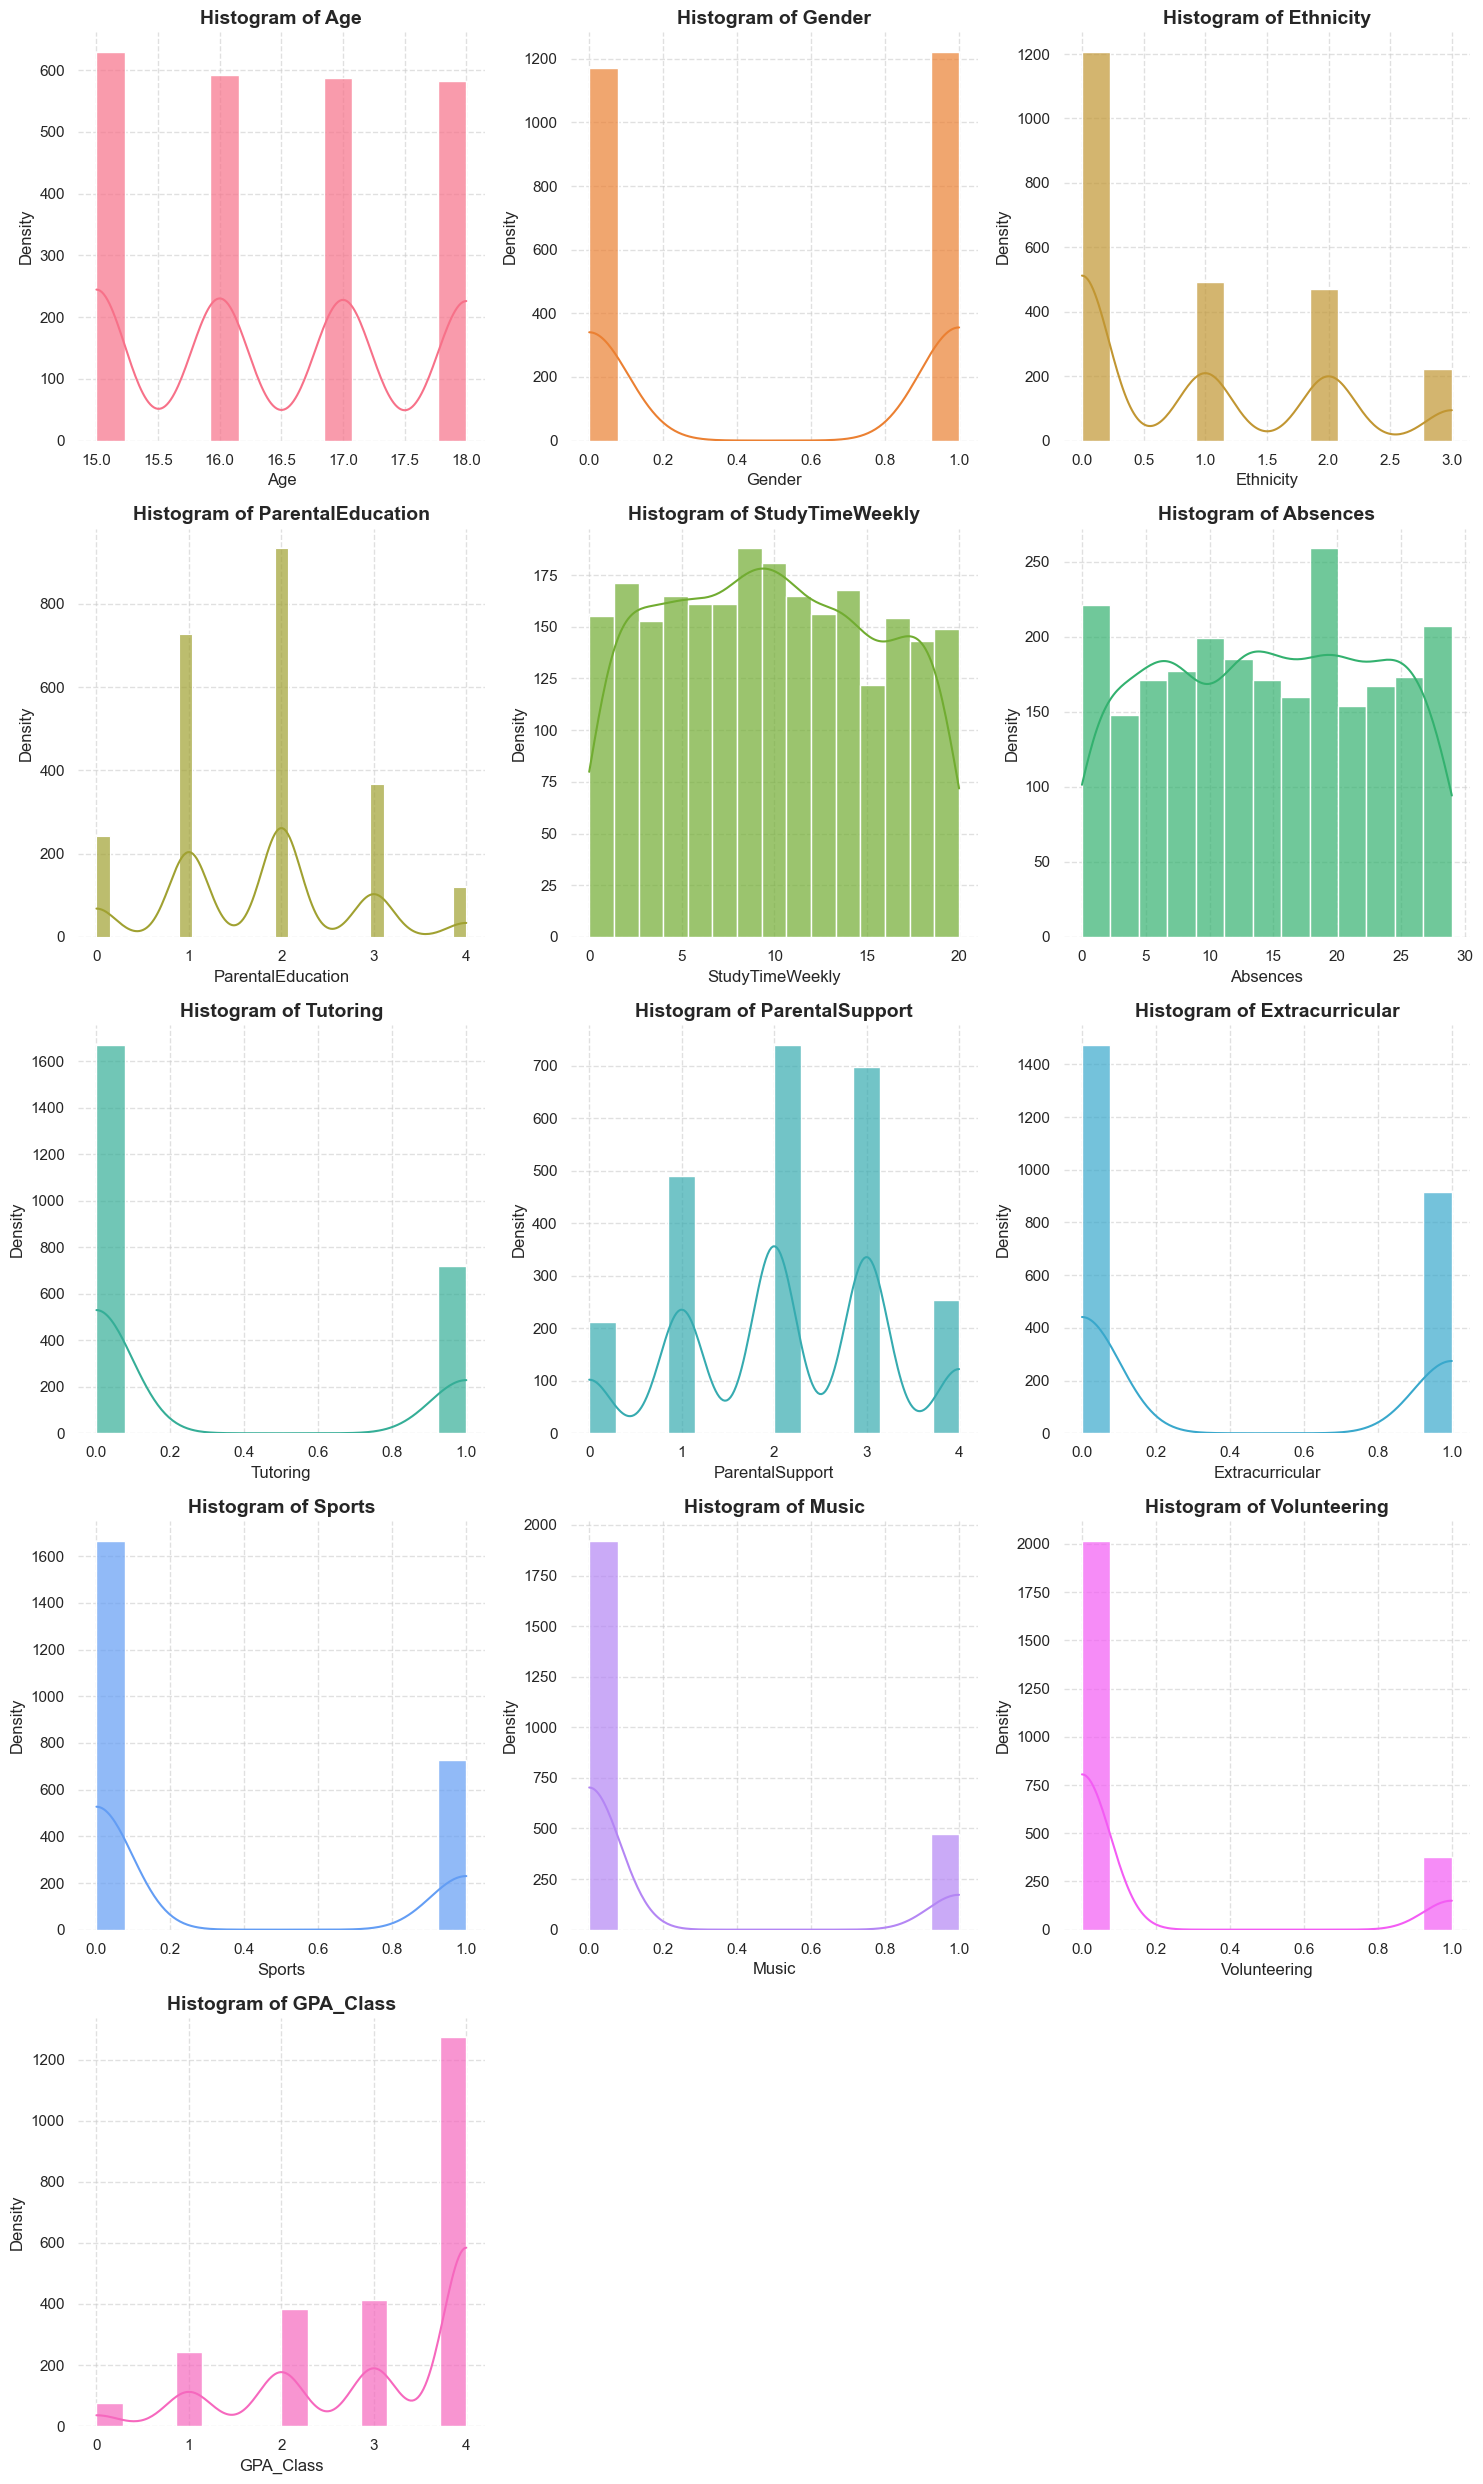

In [490]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style='whitegrid')  # Use a clean white background with gridlines
palette = sns.color_palette("husl", len(df_num))  # Set a nice color palette (you can choose other palettes too)

n_cols = 3  # Number of plots per row
n_rows = (len(df_num) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Create subplots grid
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each numerical column
for i, col in enumerate(df_num):
    sns.histplot(df[col], fill=True, kde=True, color=palette[i], ax=axes[i], alpha=0.7)  # Set transparency and KDE
    axes[i].set_title(f'Histogram of {col}', fontsize=14, fontweight='bold')  # Bold and larger titles
    axes[i].set_xlabel(col, fontsize=12)  # Larger x-axis labels
    axes[i].set_ylabel('Density', fontsize=12)  # Larger y-axis labels
    axes[i].grid(True, linestyle='--', alpha=0.6)  # Add gridlines with transparency
    sns.despine(left=True, bottom=True)  # Remove the spines for cleaner plots

# Remove any empty subplots if the number of columns is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### Converting all the variables with levels as categorical variable by keeping only numerical variables ['StudyTimeWeekly','Absences', 'GPA']

In [491]:
num_columns = ['StudyTimeWeekly','Absences', 'GPA']
df[[col for col in df.columns if col not in num_columns]] = df[[col for col in df.columns if col not in num_columns]].astype('object')


In [492]:
df_num = df.select_dtypes(include=['int64','float64']).columns
df_cat = df.select_dtypes(include=['object','category']).columns

In [493]:
df_num

Index(['StudyTimeWeekly', 'Absences'], dtype='object')

### Distribution of Numerical variables

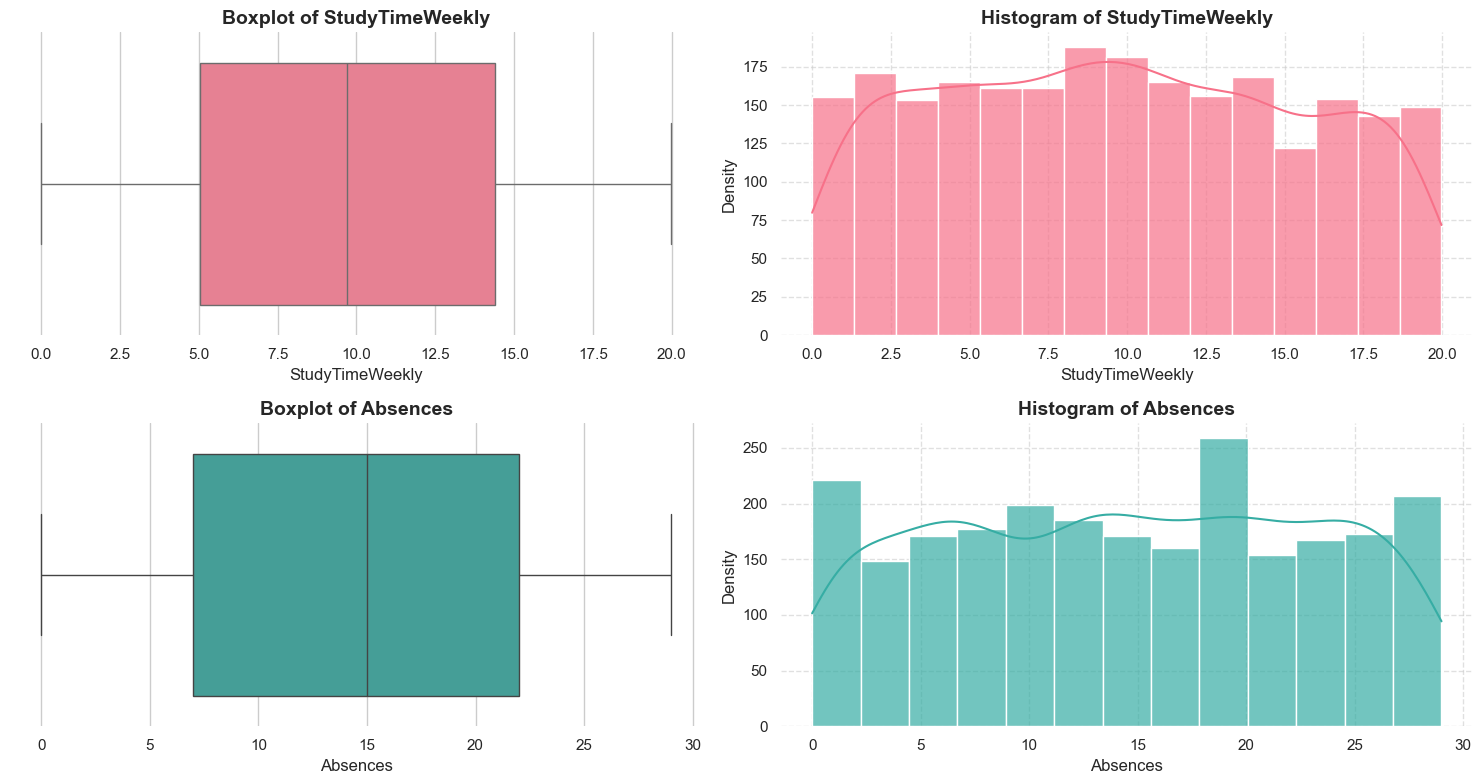

In [494]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style='whitegrid')  # Use a clean white background with gridlines
palette = sns.color_palette("husl", len(df_num))  # Set a nice color palette

n_cols = 2  # Number of plots per row
n_rows = (len(df_num) + n_cols - 1) // n_cols  # Calculate the number of rows required

# Create subplots grid for boxplots and histograms (2 rows per numerical column)
fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(15, n_rows * 8))  # Two rows for each numerical column
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop through numerical columns to create boxplots and histograms
for i, col in enumerate(df_num):
    # Vertical boxplot on the first row
    sns.boxplot(x=df[col], ax=axes[2 * i], color=palette[i])  # Vertical boxplot
    axes[2 * i].set_title(f'Boxplot of {col}', fontsize=14, fontweight='bold')  # Title for boxplot
    axes[2 * i].set_xlabel(col, fontsize=12)  # x-axis label for boxplot
    sns.despine(left=True, bottom=True)  # Remove the spines for cleaner plots

    # Histogram on the second row
    sns.histplot(df[col], fill=True, kde=True, color=palette[i], ax=axes[2 * i + 1], alpha=0.7)  # Set transparency and KDE
    axes[2 * i + 1].set_title(f'Histogram of {col}', fontsize=14, fontweight='bold')  # Title for histogram
    axes[2 * i + 1].set_xlabel(col, fontsize=12)  # x-axis label for histogram
    axes[2 * i + 1].set_ylabel('Density', fontsize=12)  # y-axis label for histogram
    axes[2 * i + 1].grid(True, linestyle='--', alpha=0.6)  # Add gridlines with transparency
    sns.despine(left=True, bottom=True)  # Remove the spines for cleaner plots

# Remove any empty subplots if the number of columns is not a multiple of n_cols
for j in range(2 * i + 2, len(axes)):  # Start removing from the next empty axis
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



### Plotting Pie Charts for categorcal variables

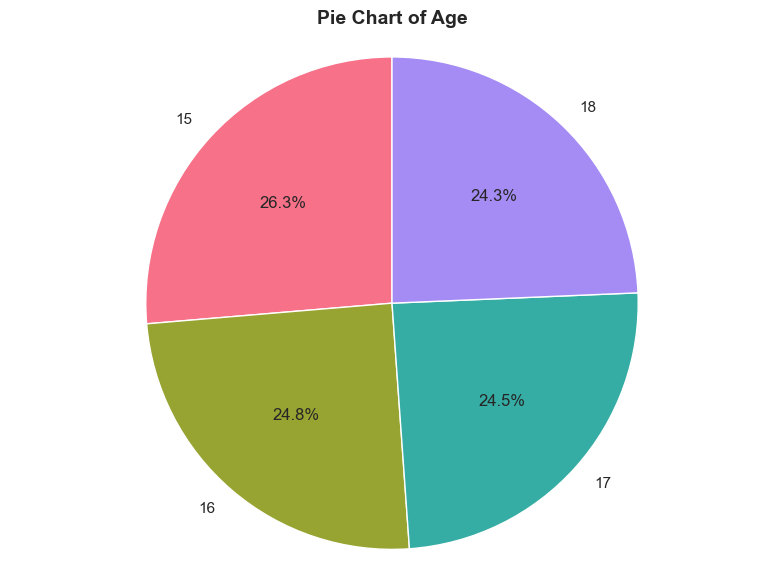

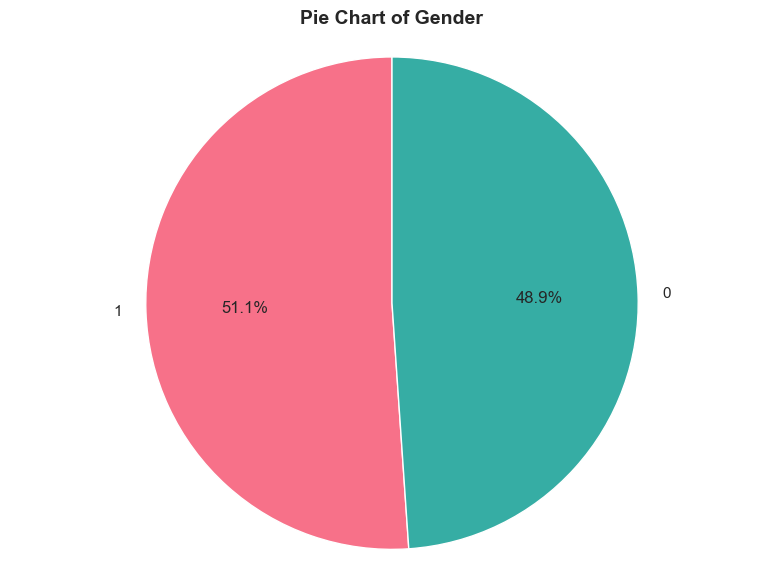

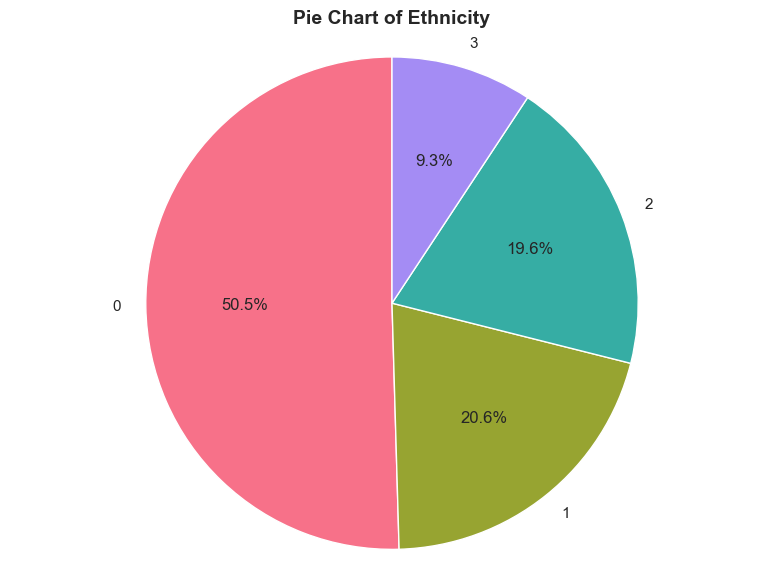

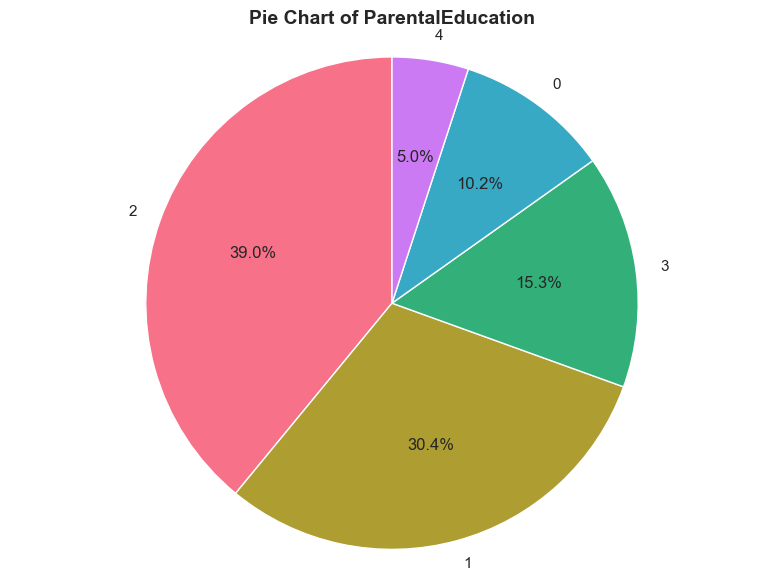

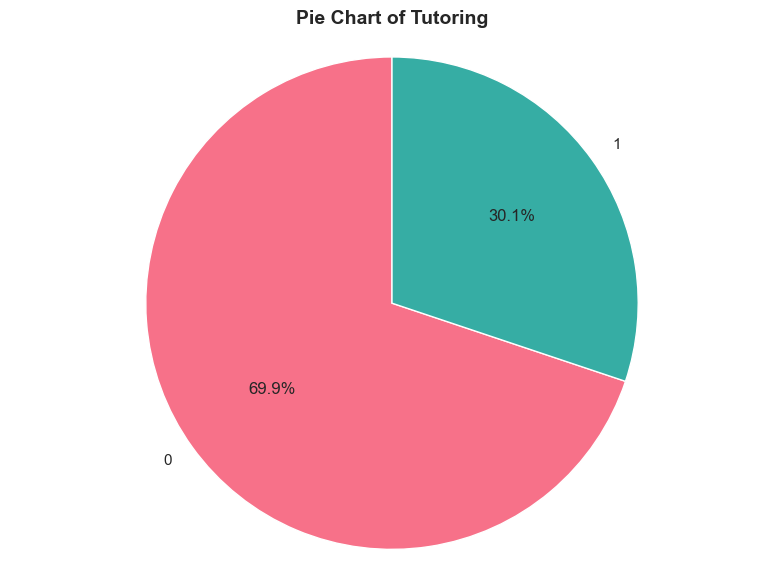

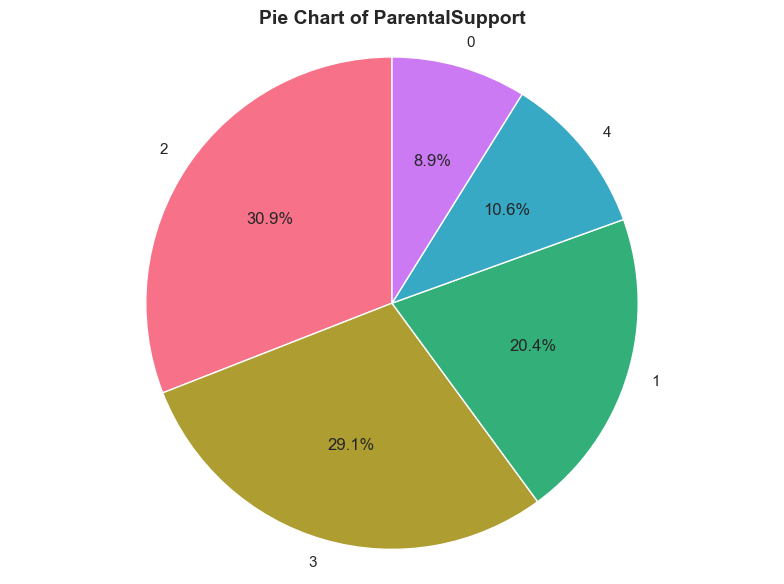

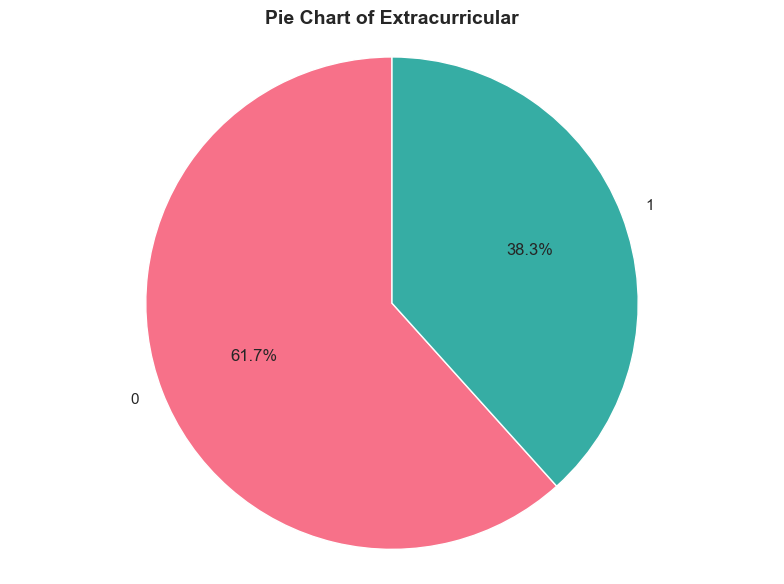

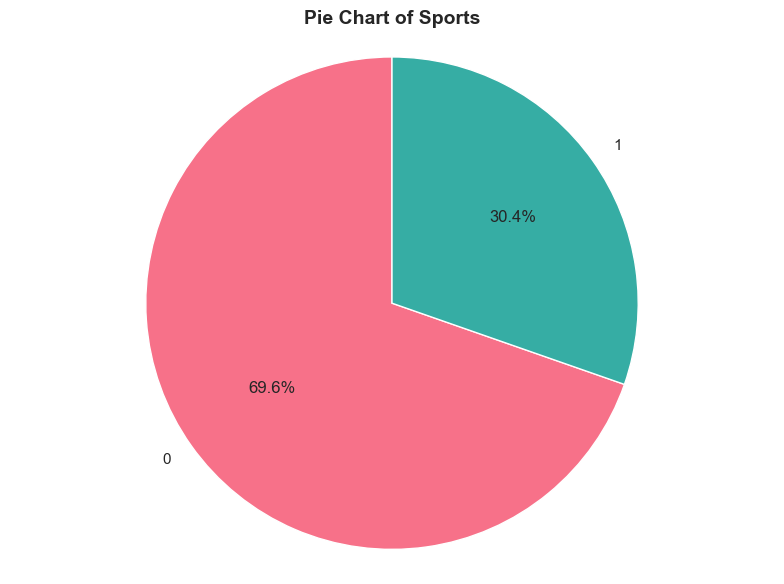

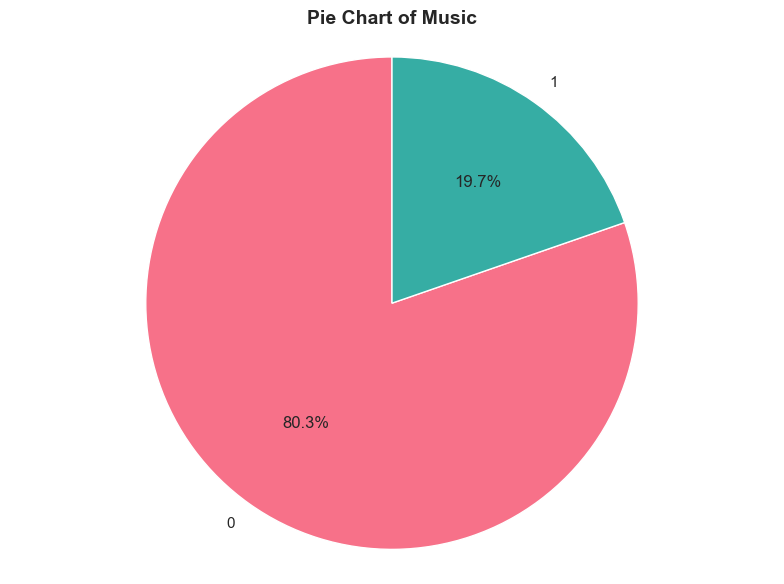

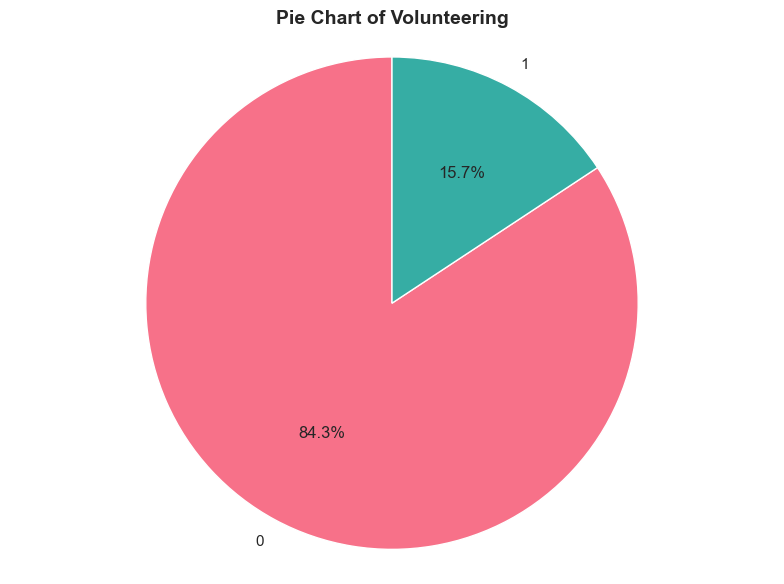

In [495]:
# Plot each categorical column as a pie chart in separate plots
for col in df_cat:
     if col != 'GPA_Class':
        values = df[col].value_counts()  # Get the counts of each category in the column
        
        plt.figure(figsize=(8, 6))  # Create a new figure for each pie chart
        plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(values)))
        plt.title(f'Pie Chart of {col}', fontsize=14, fontweight='bold')  # Bold and larger titles
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()  # Display the pie chart


### Distribution of the Response Variable

In [496]:
df['GPA_Class'] = df["GPA_Class"].map({0.0:'0', 1.0:'1', 2.0:'2', 3.0:'3', 4.0:'4'})

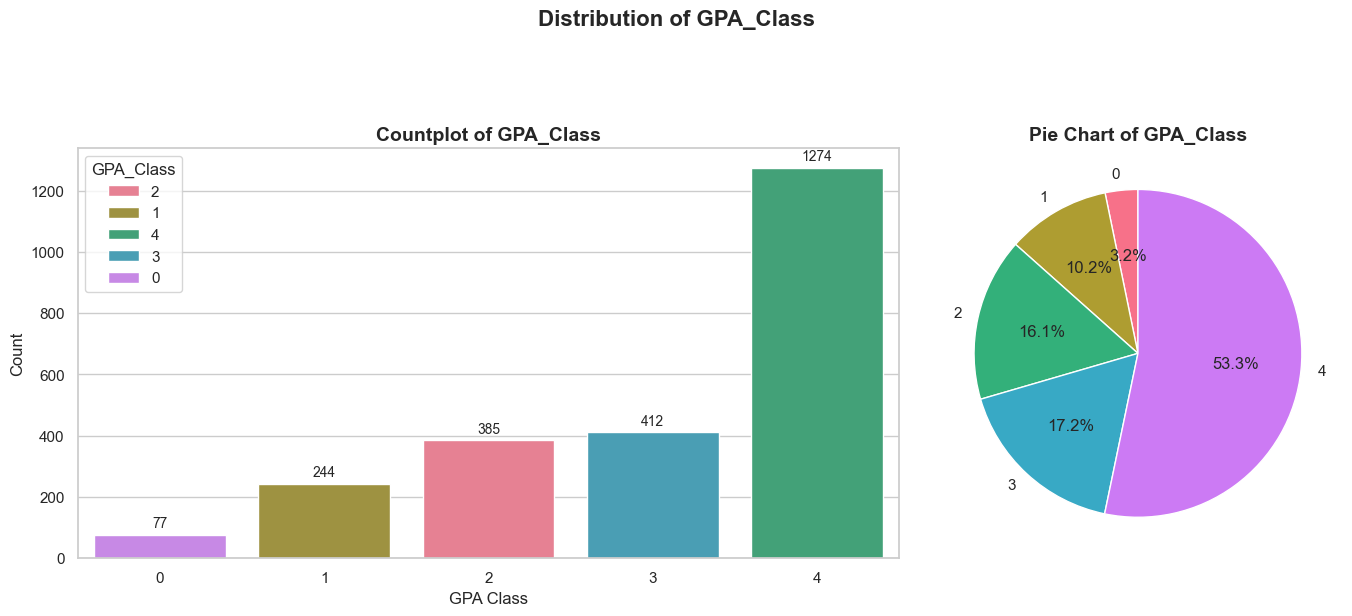

In [497]:
# Set a style for the plots
sns.set_style("whitegrid")

# Create a figure with 1 row and 2 columns for the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})
fig.suptitle("Distribution of GPA_Class", fontsize=16, fontweight='bold', y=1.05)

# Specify the desired order of GPA_Class
order = ['0', '1', '2', '3', '4']

# Countplot with specific order and limited colors
palette = sns.color_palette("husl", n_colors=5)  # Limit palette to 5 colors
sns.countplot(data=df, x='GPA_Class', hue='GPA_Class', palette=palette[:5], order=order, ax=axes[0], legend=True)
axes[0].set_title('Countplot of GPA_Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('GPA Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Show values on top of each bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', padding=3, fontsize=10)

# Pie chart with custom colors and labels
colors = sns.color_palette("husl", n_colors=5)  # Limit pastel palette to 5 colors
df['GPA_Class'].value_counts().reindex(order).plot.pie(
    autopct='%1.1f%%', startangle=90, colors=colors, ax=axes[1])
axes[1].set_title('Pie Chart of GPA_Class', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')  # Remove y-label for cleaner look

# Adjust layout for a cleaner appearance
plt.tight_layout(pad=2.0)
plt.show()



## Bivariate Analysis

### Violin plots for numerical variables Vs response variable

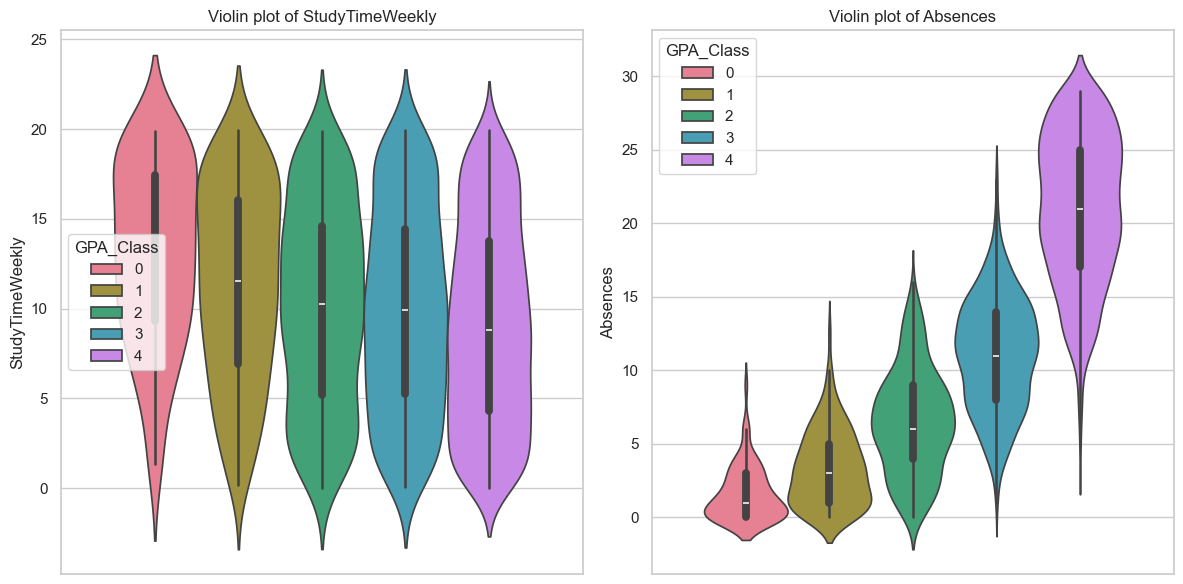

In [498]:
# Initialize the figure and the axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes = axes.flatten()
hue_order = ['0', '1', '2', '3', '4']
# Define a color palette for the hue
palette = sns.color_palette("husl", len(hue_order))

# Plot violin plots in each subplot
for idx, col in enumerate(df[df_num].columns):
    sns.violinplot(ax=axes[idx], y=df[col], hue=df['GPA_Class'],palette=palette, hue_order=hue_order)
    axes[idx].set_title(f'Violin plot of {col}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [499]:
df_cat

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GPA_Class'],
      dtype='object')

### Grouped Bar charts for Categorical variables Vs the response

<Figure size 1200x600 with 0 Axes>

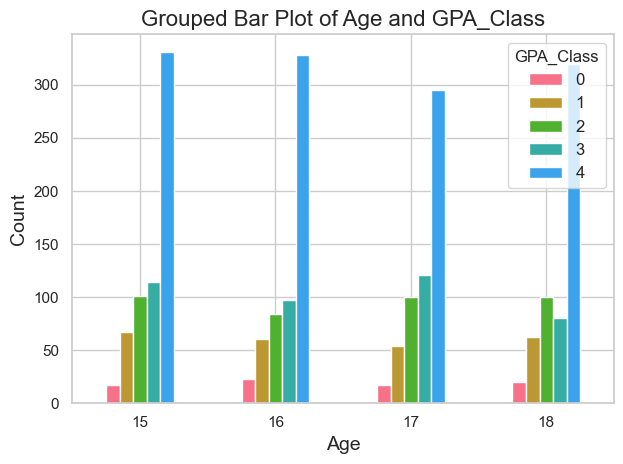

<Figure size 1200x600 with 0 Axes>

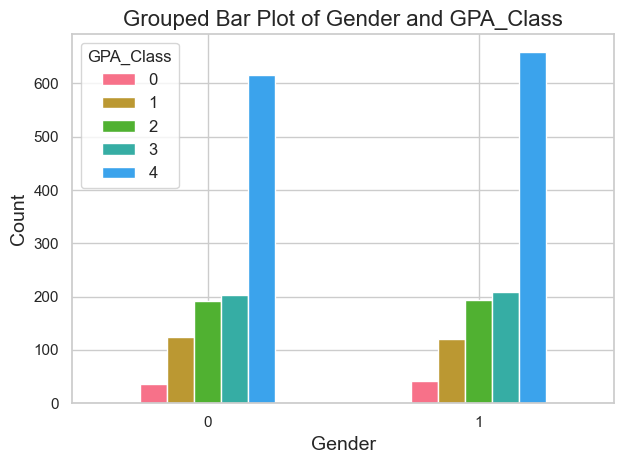

<Figure size 1200x600 with 0 Axes>

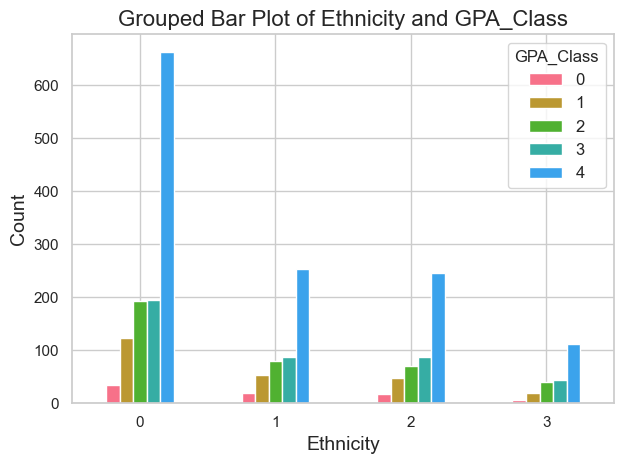

<Figure size 1200x600 with 0 Axes>

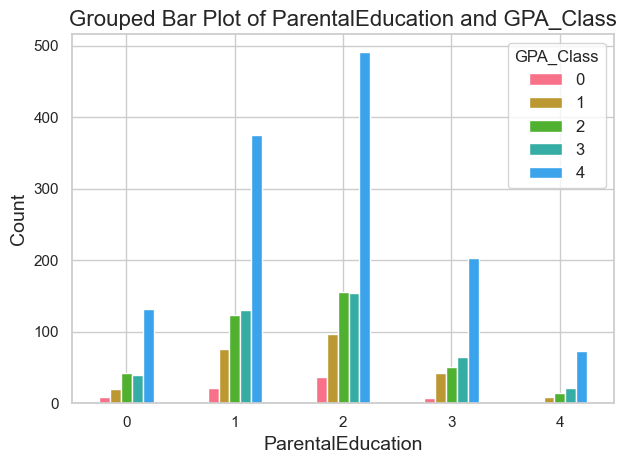

<Figure size 1200x600 with 0 Axes>

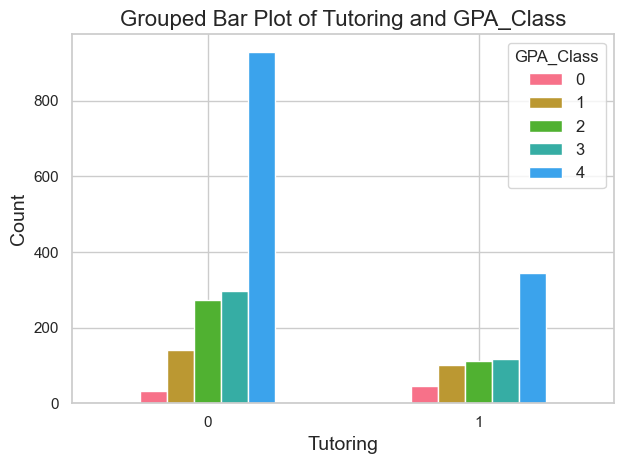

<Figure size 1200x600 with 0 Axes>

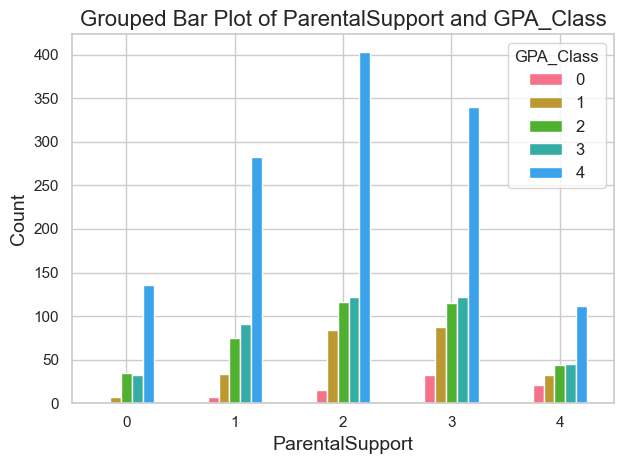

<Figure size 1200x600 with 0 Axes>

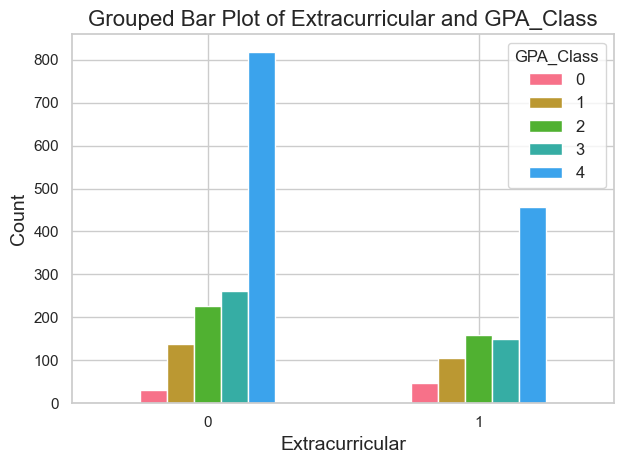

<Figure size 1200x600 with 0 Axes>

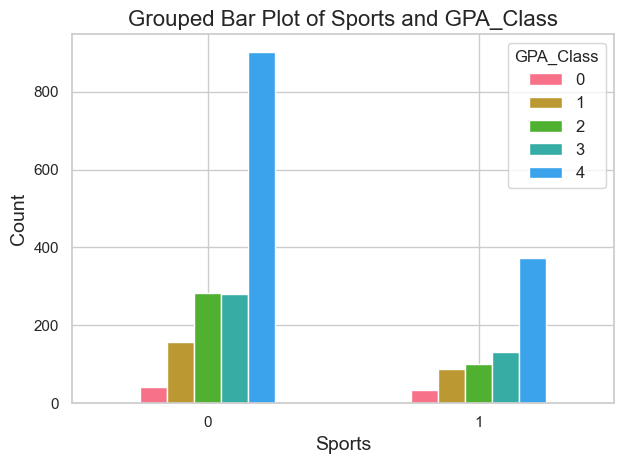

<Figure size 1200x600 with 0 Axes>

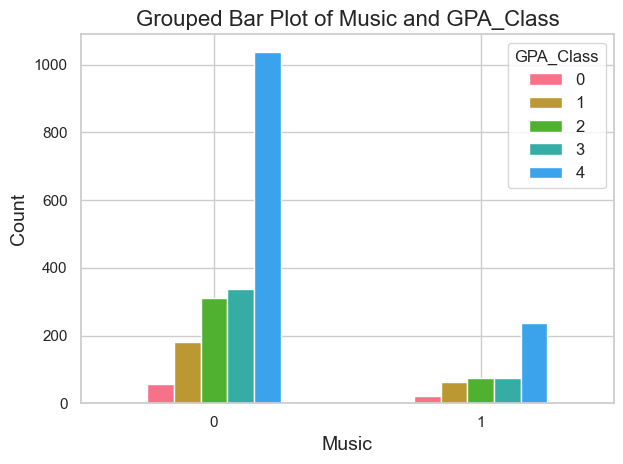

<Figure size 1200x600 with 0 Axes>

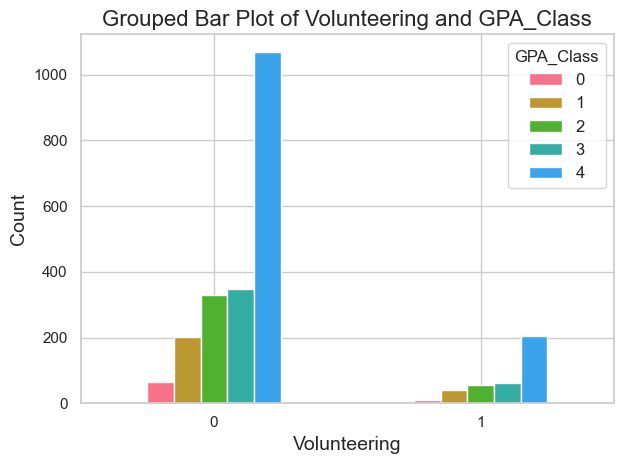

In [500]:
# Grouped Bar Plot
for columns in df_cat:
    if columns != "GPA_Class":
       plt.figure(figsize=(12, 6))
       df.groupby([columns, 'GPA_Class']).size().unstack().plot(kind='bar', stacked=False, color=sns.color_palette("husl"))
       plt.title(f'Grouped Bar Plot of {columns} and GPA_Class', fontsize=16)
       plt.xlabel(columns, fontsize=14)
       plt.ylabel('Count', fontsize=14)
       plt.xticks(rotation=0)
       plt.legend(title='GPA_Class', fontsize=12)
       plt.tight_layout()
       plt.show()

## Chi-Squared Test to check the relationship between the response and the catergorical variable

In [501]:
from scipy.stats import chi2_contingency

# Dictionary to store results
results = {}

for var in df_cat:
    if var!= 'GPA_Class':
      # Create a contingency table
      contingency_table = pd.crosstab(df[var], df['GPA_Class'])
    
      # Perform the Chi-Squared Test
      chi2, p, dof, expected = chi2_contingency(contingency_table)
    
      # Store the results
      results[var] = {
          'Chi-Squared Statistic': chi2,
          'Degrees of Freedom': dof,
          'p-value': p,
                          }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Interpretation of p-values
alpha = 0.05
for var, result in results.items():
    if result['p-value'] < alpha:
        print(f"{var}: Reject the null hypothesis - significant association with GPA_Class (p = {result['p-value']})")
    else:
        print(f"{var}: Do not reject the null hypothesis - no significant association with GPA_Class (p = {result['p-value']})")

                   Chi-Squared Statistic  Degrees of Freedom       p-value
Age                            14.934081                12.0  2.450612e-01
Gender                          0.869825                 4.0  9.288495e-01
Ethnicity                       6.604923                12.0  8.825805e-01
ParentalEducation              13.644970                16.0  6.251440e-01
Tutoring                       51.602963                 4.0  1.670005e-10
ParentalSupport                73.231412                16.0  2.692703e-09
Extracurricular                24.628949                 4.0  5.973319e-05
Sports                         14.106157                 4.0  6.963840e-03
Music                           9.213578                 4.0  5.597719e-02
Volunteering                    0.926164                 4.0  9.207775e-01
Age: Do not reject the null hypothesis - no significant association with GPA_Class (p = 0.2450611881127206)
Gender: Do not reject the null hypothesis - no significant associat

## Kruskal Wallis Test to check the relationship between the response and the Numerical variables

In [502]:
from scipy.stats import kruskal

for column in df_num:
    # Group the scores by GPA_Class
    groups = [group[column].values for name, group in df.groupby('GPA_Class')]

    # Perform the Kruskal-Wallis H Test
    statistic, p_value = kruskal(*groups)

    # Display the results
    print(f"Kruskal-Wallis H statistic: {statistic}")
    print(f"p-value: {p_value}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
       print("Reject the null hypothesis - significant difference among groups.")
    else:
       print("Do not reject the null hypothesis - no significant difference among groups.")


Kruskal-Wallis H statistic: 60.184558093430496
p-value: 2.65302791038926e-12
Reject the null hypothesis - significant difference among groups.
Kruskal-Wallis H statistic: 1751.725901482142
p-value: 0.0
Reject the null hypothesis - significant difference among groups.


## Checking Multicollinearity between Categorical Variables

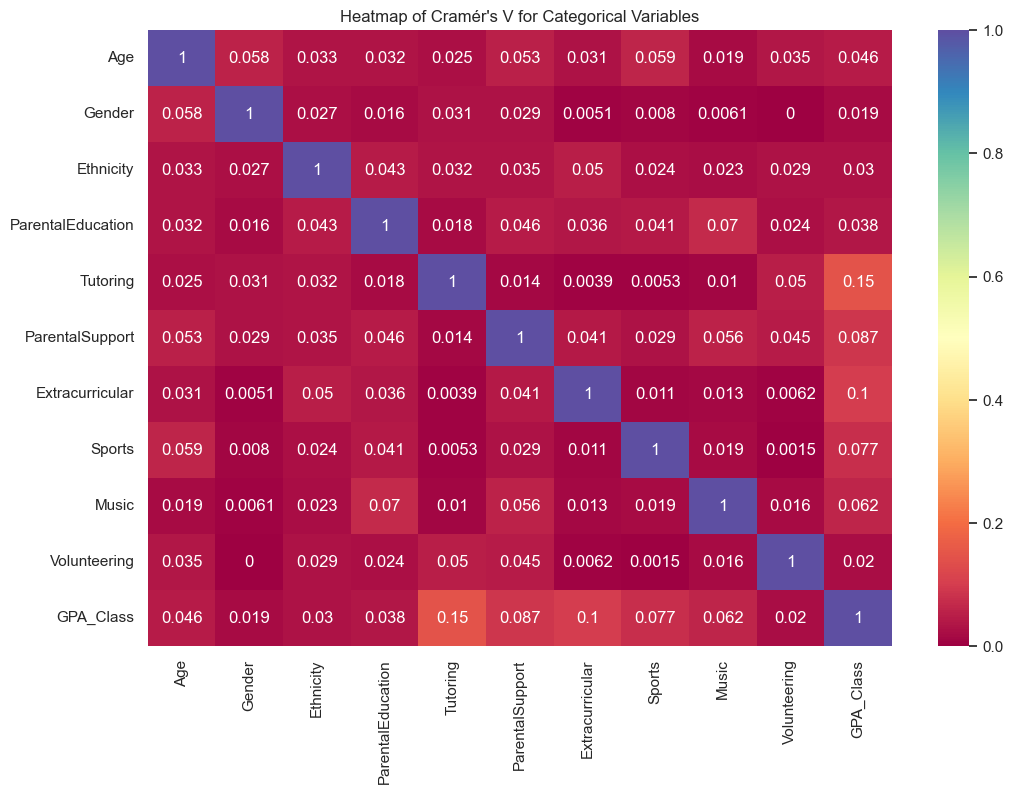

In [503]:
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))


# Initialize an empty DataFrame to store Cramér's V values
columns = df_cat
cramers_v_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))), index=columns, columns=columns)

# Calculate Cramér's V for each pair of categorical variables
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Perfect correlation with itself
        else:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Spectral', vmin=0, vmax=1)
plt.title('Heatmap of Cramér\'s V for Categorical Variables')
plt.show()

## Checking Multicollinearity between Numerical Variables

<Axes: >

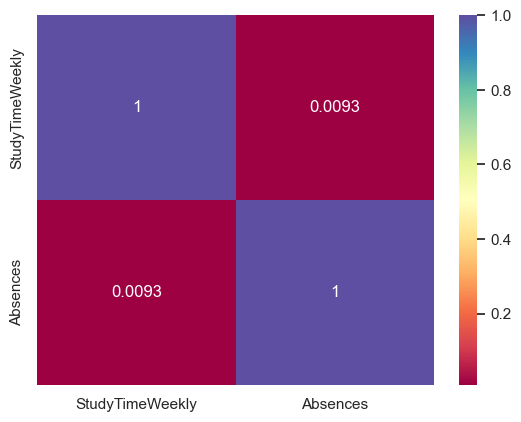

In [504]:
sns.heatmap(df[df_num].corr(), annot=True, cmap="Spectral")

In [505]:
# train test split before further analysis
from sklearn.model_selection import train_test_split

X = df.drop(['GPA_Class'], axis=1)
y = df['GPA_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

df_train = pd.concat([X_train, pd.DataFrame(y_train)], join='inner', axis=1)
df_train.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA_Class
1512,15,0,2,1,4.459000,27,0,1,0,0,0,0,4
227,16,0,0,2,8.090390,27,0,3,0,1,0,0,4
657,17,1,0,1,17.531210,25,1,3,0,0,0,0,4
412,16,0,1,2,10.437246,19,1,1,1,1,1,0,4
1233,15,1,0,2,7.599199,22,0,4,0,1,1,0,4


In [535]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['float']).columns

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


## Checking Multicollinearity using Variance Inflation Factor (GVIF)

In [546]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Transform X_train using the updated pipeline
X_train_pre = pipeline.fit_transform(X_train)

# Convert to dense format if sparse
if hasattr(X_train_pre, "toarray"):  # Check if it's sparse
    X_train_pre = X_train_pre.toarray()

# Retrieve feature names
try:
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names()

# Convert the transformed data to a DataFrame with the feature names
X_train_pre_df = pd.DataFrame(X_train_pre, columns=feature_names)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_pre_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_pre_df.values, i) for i in range(X_train_pre_df.shape[1])]

# Display VIF values
print(vif_data)




                     Feature       VIF
0       num__StudyTimeWeekly  1.009852
1                cat__Age_16  1.844586
2                cat__Age_17  1.866904
3                cat__Age_18  1.831707
4              cat__Gender_1  1.997014
5           cat__Ethnicity_1  1.378057
6           cat__Ethnicity_2  1.383502
7           cat__Ethnicity_3  1.173895
8   cat__ParentalEducation_1  3.029829
9   cat__ParentalEducation_2  3.509204
10  cat__ParentalEducation_3  1.998933
11  cat__ParentalEducation_4  1.323959
12           cat__Tutoring_1  1.413203
13    cat__ParentalSupport_1  2.389030
14    cat__ParentalSupport_2  3.020443
15    cat__ParentalSupport_3  3.036130
16    cat__ParentalSupport_4  1.788558
17    cat__Extracurricular_1  1.605439
18             cat__Sports_1  1.432907
19              cat__Music_1  1.265479
20       cat__Volunteering_1  1.190265


## Factor Analysis for Mixed Data(FAMD)

In [531]:
import prince

# Initialize FAMD
famd = prince.FAMD(
    n_components=10,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn'
)

# Fit FAMD on the dataset
famd = famd.fit(df_train)

c:\Users\User\Desktop\Python\.venv\lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.42282004491461805, -0.4652031915295775, -0.38800628359708395, -0.44803106456408537, -0.41154281141173304, -0.45151774022003055, -0.4409750162724378, -0.46856210295784717, -0.4265128665123421, -0.40384974407163177, -0.43740430960097004, -0.4850078544963549, -0.49143207949940365, -0.4301739883111838, -0.4549776968735704, -0.4153359128990036, -0.4784973867067682, -0.4882305335004487, -0.3714877338956415, -1.2547869657139679, -1.2218604754358433, -1.1998431680056034, -1.7388281289110534, -1.110233724563141, -1.100301721676612, -0.730201298427922, -1.9278680916976365, -1.5110673780523864, -0.7820516665797785, -0.9828641589988073, -1.0158184327639055, -1.7877436008656176, -1.7179596208164734, -1.7460282761868777, -2.186304374170842, -1.1045692298273762, -0.7658415827365381, -1.3533949876815903, -1.5265553199274324, -0.9780657699191331, -0.542

In [532]:
summary = famd.eigenvalues_summary
summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,11.583,3.63%,3.63%
1,9.557,3.00%,6.63%
2,8.049,2.52%,9.15%
3,7.162,2.25%,11.40%
4,6.994,2.19%,13.59%
5,6.837,2.14%,15.73%
6,6.805,2.13%,17.86%
7,6.617,2.07%,19.94%
8,6.587,2.06%,22.00%


In [533]:
summary['% of variance'] = summary['% of variance'].replace({'%':''}, regex=True).astype('float')
summary['% of variance']

component
0    3.63
1    3.00
2    2.52
3    2.25
4    2.19
5    2.14
6    2.13
7    2.07
8    2.06
9    2.04
Name: % of variance, dtype: float64

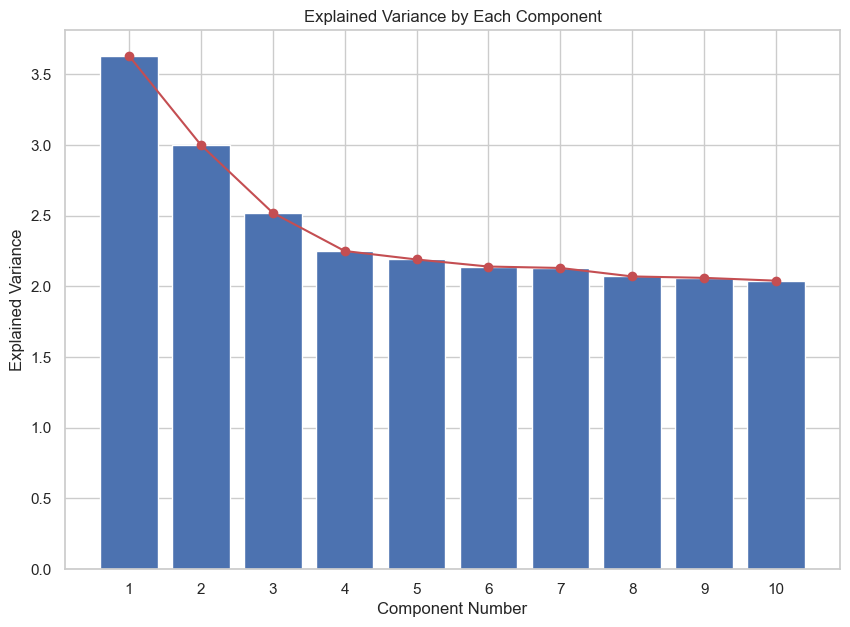

In [534]:
# Get the explained inertia (variance) for each component
# and generate the bar plot
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(summary) + 1), summary['% of variance'])
plt.plot(range(1, len(summary) + 1), summary['% of variance'], 'ro')
plt.plot(range(1, len(summary) + 1), summary['% of variance'], 'r-')
plt.title('Explained Variance by Each Component')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(summary) + 1))
plt.grid(True)
plt.show()

All the VIF values are less than 5. Therefore it indicates that there is no multicollinearity

## Checking Clusters

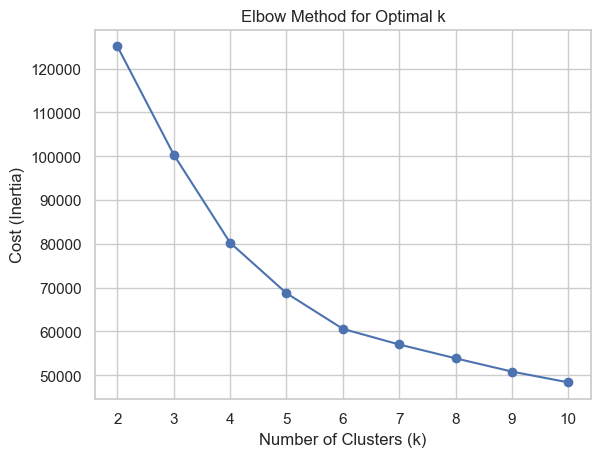

In [ ]:
df_mat = X_train.to_numpy()

# identify the optimal number of clusters using elbow graph
from kmodes.kprototypes import KPrototypes

# Specify the indices of the categorical features
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_cols]
# Initialize an empty list to store the cost (inertia) for each k
costs = []

for k in range(2,11):
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
    clusters = kproto.fit_predict(df_mat, categorical=categorical_indices)
    cost = kproto.cost_
    costs.append(cost)

# Plot the elbow graph
plt.plot(range(2,11), costs, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.show()

In [ ]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(2,11), 
        y=costs, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 5 clusters


In [ ]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, silhouette_samples

# Separate numerical and categorical data
num_data = X_train.select_dtypes(['float']).values
cat_data = X_train.select_dtypes(['int']).values
cat_data = cat_data.astype('float')

# Calculate Euclidean distance for numerical data
euclidean_dist = cdist(num_data, num_data, metric='euclidean')

# Calculate matching distance for categorical data
matching_dist = cdist(cat_data, cat_data, metric='matching')

# Combine distances with weights
# Assuming equal weights for numerical and categorical distances
weight_num = 6
weight_cat = 8

combined_dist = weight_num * euclidean_dist + weight_cat * matching_dist

# getting the sillout score
s = silhouette_score(combined_dist, clusters, metric="precomputed")
print('silhouette score (k=5):', s)

silhouette score (k=5): 0.0019352315556278208


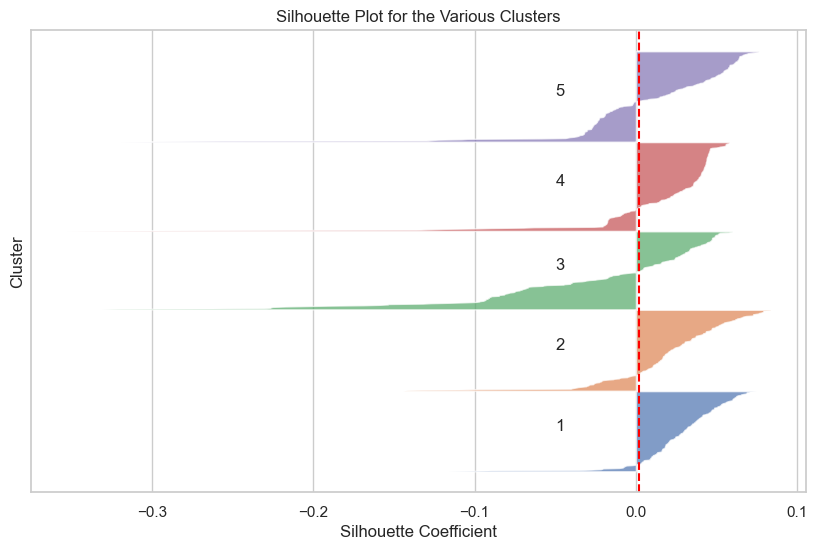

In [ ]:
# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(combined_dist, clusters, metric="precomputed")

# Plot silhouette scores
fig, ax = plt.subplots(figsize=(10, 6))

y_lower, y_upper = 0, 0
for i in range(5):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i + 1))

    y_lower = y_upper

ax.axvline(x=s, color="red", linestyle="--")
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.set_title('Silhouette Plot for the Various Clusters')
ax.set_yticks([])  # Clear the y-axis labels

plt.show()